In [1]:
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

# load and prepare training images
def load_real_samples(filename):
    # load the dataset
    data = load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

Using TensorFlow backend.


In [2]:
A_data, B_data = load_real_samples('Old2Young_64.npz')
print('Loaded', A_data.shape, B_data.shape)

Loaded (1522, 64, 64, 3) (7324, 64, 64, 3)


In [3]:
# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('AtoBmods/g_model_AtoB_098930.h5', cust)
model_BtoA = load_model('BtoAmods/g_model_BtoA_098930.h5', cust)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\sree-LM\Anaconda3\envs\t-gpu\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    return X

In [11]:
# plot A->B->A
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
#A_reconstructed = model_BtoA.predict(B_generated)

In [12]:
%matplotlib inline

# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1):
    images = vstack((imagesX, imagesY1))
    titles = ['Real', 'Generated']
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, len(images), 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i])
        # title
        pyplot.title(titles[i])
        pyplot.savefig('hggfhfh.jpg')
    pyplot.show()

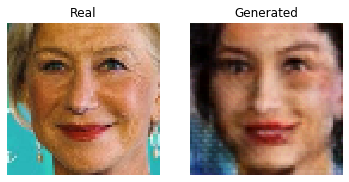

In [13]:
show_plot(A_real, B_generated)